In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 27

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(72, activation='relu'),  # increased from 20 to 64 neurons
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(36, activation='relu'),  # increased from 10 to 32 neurons
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 72)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,628 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │             999 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,723 (26.26 KB)

 Trainable params: 6,723 (26.26 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
19/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0472 - loss: 3.2967
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0523 - loss: 3.2834 - val_accuracy: 0.0790 - val_loss: 3.1736
Epoch 2/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0779 - loss: 3.1759 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0785 - loss: 3.1733 - val_accuracy: 0.0948 - val_loss: 3.0837
Epoch 3/1000
22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0907 - loss: 3.1012 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0916 - loss: 3.0943 - val_accuracy: 0.1290 - val_loss: 2.9534
Epoch 4/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1127 - loss: 2.9910 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.5704 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
[4.3967105e-02 2.7734296e-07 4.9190436e-07 3.4007422e-05 3.8498381e-04
 4.4156378e-04 3.8110342e-05 2.5477268e-06 4.0732538e-03 1.5736846e-03
 8.5390013e-05 1.5488435e-02 2.3287013e-01 2.1128964e-01 5.7846810e-05
 5.0819793e-04 2.9675719e-05 4.0534507e-03 1.6176680e-01 3.0035442e-01
 3.4700122e-07 1.6685837e-08 6.8459244e-08 4.9998396e-04 2.2366369e-02
 1.0737094e-04 5.8274354e-06]
19


# 混同行列

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


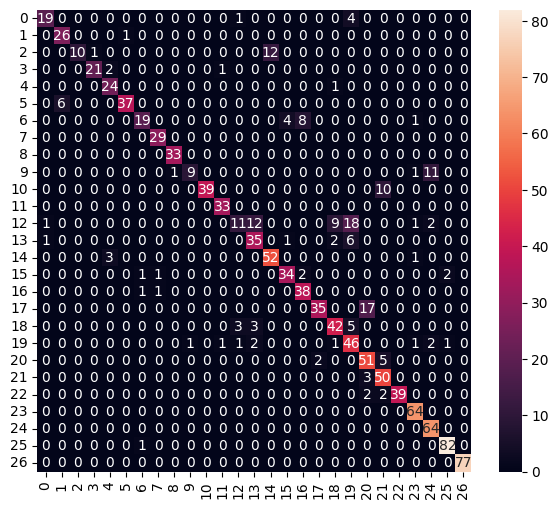

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.81      0.96      0.88        27
           2       1.00      0.43      0.61        23
           3       0.95      0.88      0.91        24
           4       0.83      0.96      0.89        25
           5       0.97      0.86      0.91        43
           6       0.86      0.59      0.70        32
           7       0.94      1.00      0.97        29
           8       0.97      1.00      0.99        33
           9       0.90      0.41      0.56        22
          10       1.00      0.80      0.89        49
          11       0.94      1.00      0.97        33
          12       0.69      0.20      0.31        54
          13       0.67      0.78      0.72        45
          14       0.81      0.93      0.87        56
          15       0.87      0.85      0.86        40
          16       0.79      0.95      0.86        40
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmpkdisr2iv\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmpkdisr2iv\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmpkdisr2iv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  3225676566352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3225676572496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3225676572112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3225676564816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3226435859856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3226435858128: TensorSpec(shape=(), dtype=tf.resource, name=None)


13488

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.99 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.36486602e-02 2.53921172e-07 4.69850988e-07 3.14711979e-05
 3.63365281e-04 4.39496216e-04 3.77292963e-05 2.57172587e-06
 3.79311712e-03 1.66530511e-03 9.06212808e-05 1.54889794e-02
 2.34338701e-01 2.08396778e-01 5.70967604e-05 5.19866240e-04
 2.99277890e-05 3.97613831e-03 1.60378784e-01 3.02156985e-01
 3.39378602e-07 1.72782020e-08 6.73381351e-08 4.79285984e-04
 2.39956435e-02 1.02107115e-04 6.23119422e-06]
19
